In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/a3426/Desktop/인지개/third week/boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


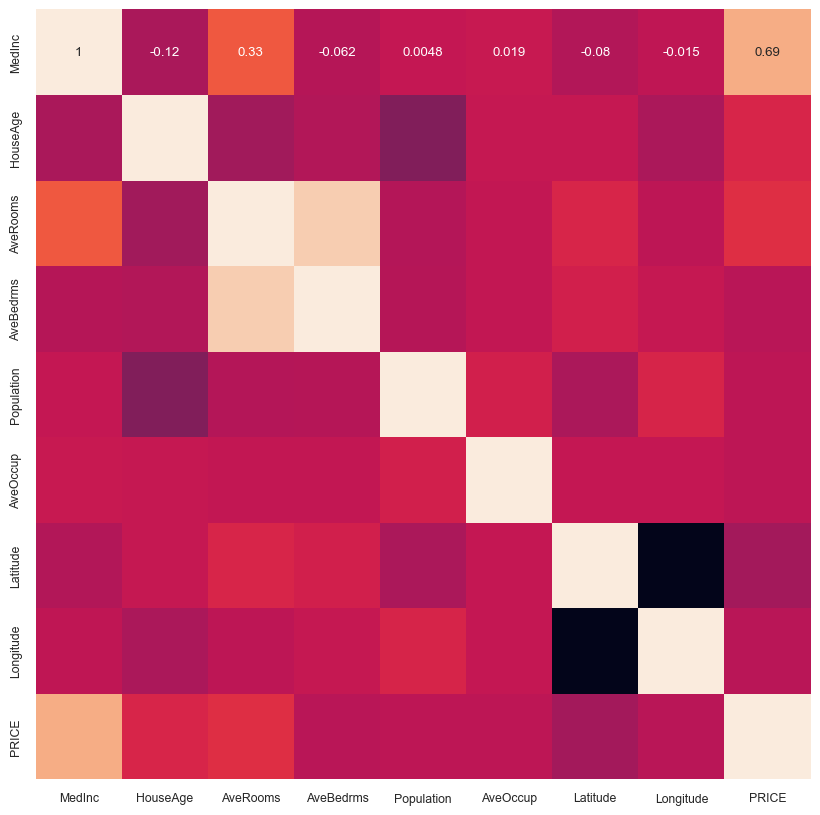

In [203]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [204]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [205]:
new_df=df[['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE']]
      

In [206]:
new_df.columns

Index(['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'PRICE'],
      dtype='object')

In [207]:
new_df=df[['MedInc', 'AveBedrms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'PRICE']]

In [208]:
df_one='MedInc'

In [209]:
df_two='PRICE'

In [210]:
'''
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |
'''

'\n| MedInc | 블록의 중간 소득 |\n| HouseAge | 블록의 중간 주택 연도 |\n| AveRooms | 주택 1가구당 평균 방의 수 |\n| AveBedrms | 주택 1가구당 평균 침실의 수 |\n| Population | 인구 |\n| AveOccup |  average house occupancy 평균 주택점유율 |\n| Latitude | 위도 |\n| Longitude | 경도 |\n'

In [211]:
X = df.drop(df_two, axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [212]:
y = df[df_two]
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 0.5269927956248032
평균제곱근오차 0.5269927956248032
평균제곱근오차 0.5269927956248023


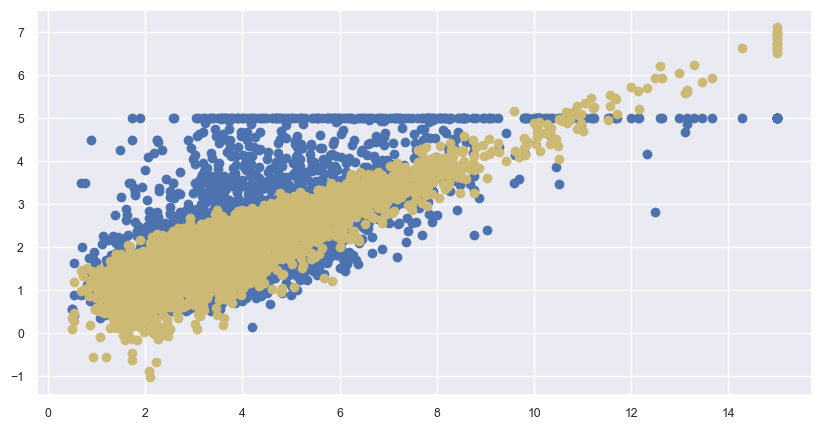

In [215]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test[df_one], y_test, label='y_test')
plt.scatter(X_test[df_one], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()      

In [216]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.48192669260145343


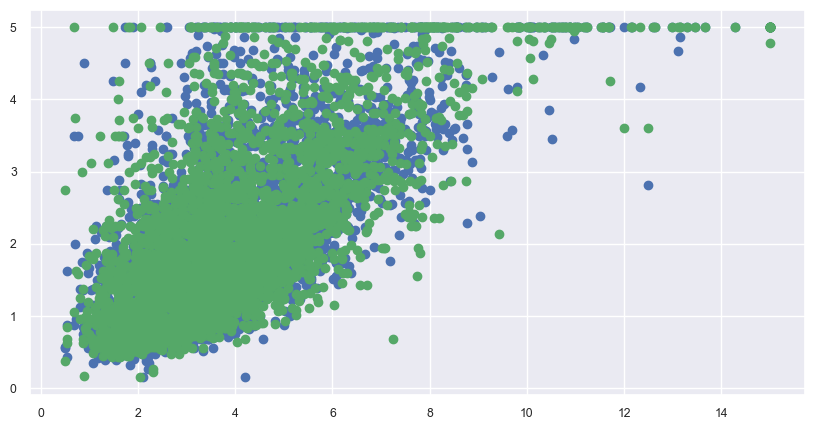

In [217]:
plt.figure(figsize=(10,5))
plt.scatter(X_test[df_one], y_test, label='y_test')
plt.scatter(X_test[df_one], dy_preds, c='g', label='dy_preds')
plt.show()       

In [218]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.25050128009462813


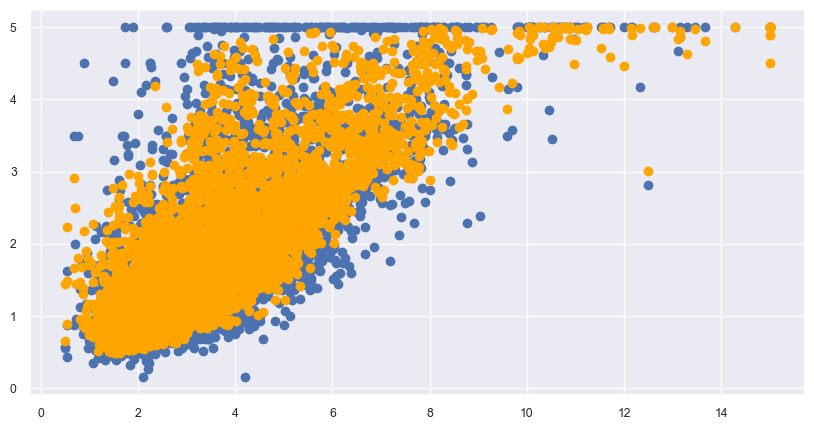

In [219]:
plt.figure(figsize=(10,5))
plt.scatter(X_test[df_one], y_test, label='y_test')
plt.scatter(X_test[df_one], ry_preds, c='orange', label='ry_preds')

plt.show()

새로운 칼럼

In [220]:
new_X = new_df.drop(df_two, axis=1)
new_X.head()

,MedInc,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,1.081081,565.0,2.181467,37.85,-122.25


In [221]:
new_y = new_df[df_two]
new_y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [222]:
from sklearn.model_selection import train_test_split

new_X_train, new_X_test, new_y_train, new_y_test=train_test_split(new_X,
                                                  new_y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(new_X_train.shape, new_y_train.shape)
print(new_X_test.shape, new_y_test.shape)

(16512, 6) (16512,)
(4128, 6) (4128,)


In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_model = LinearRegression()
new_model.fit(new_X_train, new_y_train)
new_ly_preds = new_model.predict(new_X_test)

print('평균제곱근오차', mean_squared_error(new_ly_preds, new_y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(new_ly_preds,new_y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(new_ly_preds, new_y_test))

평균제곱근오차 0.5507581849257003
평균제곱근오차 0.5507581849257003
평균제곱근오차 0.5507581849257019


In [224]:
new_df.columns

Index(['MedInc', 'AveBedrms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'PRICE'],
      dtype='object')

In [228]:
new_df=df[['MedInc', 'AveBedrms', 'Population', 'AveOccup', 'Latitude','PRICE']]

In [229]:
new_df.columns

Index(['MedInc', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'PRICE'], dtype='object')

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_model = LinearRegression()
new_model.fit(new_X_train, new_y_train)
new_ly_preds = new_model.predict(new_X_test)

print('평균제곱근오차', mean_squared_error(new_ly_preds, new_y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(new_ly_preds,new_y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(new_ly_preds, new_y_test))

new_df.columns

평균제곱근오차 0.5507581849257003
평균제곱근오차 0.5507581849257003
평균제곱근오차 0.5507581849257019


Index(['MedInc', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'PRICE'], dtype='object')

In [231]:
new_df.columns

Index(['MedInc', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'PRICE'], dtype='object')

In [232]:
new_new_df=df[['MedInc', 'AveBedrms', 'Population', 'AveOccup', 'Latitude','PRICE']]